**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   Estudiante X: ZZZZZZ
*   MATRÍCULA del estudiante X: ZZZZZ
*   Estudiante 2: Alejandra Berenice Vega López
*   MATRÍCULA de la estudiante 2: A01795415
*   Estudiante 3: Israel Luján González
*   MATRÍCULA del estudiante 3: A01794693
*   Estudiante 4: Eduardo Selim Martínez Mayorga
*   MATRÍCULA del estudiante 4: A01795167

In [1]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [2]:
"""
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
os.chdir(DIR)
"""

'\nimport os\nDIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"\nos.chdir(DIR)\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [4]:
# El archivo "Cereals.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook

cereals_df = pd.read_csv('Cereals.csv')

# Se verifica la lectura y definición del dataframe
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
# Observamos el número de renglones y columnas del dataframe
cereals_df.shape

(77, 16)

# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [7]:
# Guardamos la serie en un objeto
x = cereals_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

# Ahora sí se puede contar cuántas columnas hay de cada tipo
df_columnas['tipo'].value_counts()

float64    7
int64      6
object     3
Name: tipo, dtype: int64

Esto significa que hay

+ 7 variables del tipo `float64` (i.e. que toman valores reales)
+ 6 variables del tipo `int64` (i.e. que toman valores enteros)
+ 3 variables del tipo `object` (i.e. que toman valores strings)

Veamos los descriptivos de las variables numéricas:

In [8]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Veamos los descriptivos de las variables categóricas:

In [9]:
# Se obtienen conteos, número de valores únicos, moda y
# y su frecuencia para las variables no numéricas
cereals_df.describe(include = 'object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Corn_Flakes,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

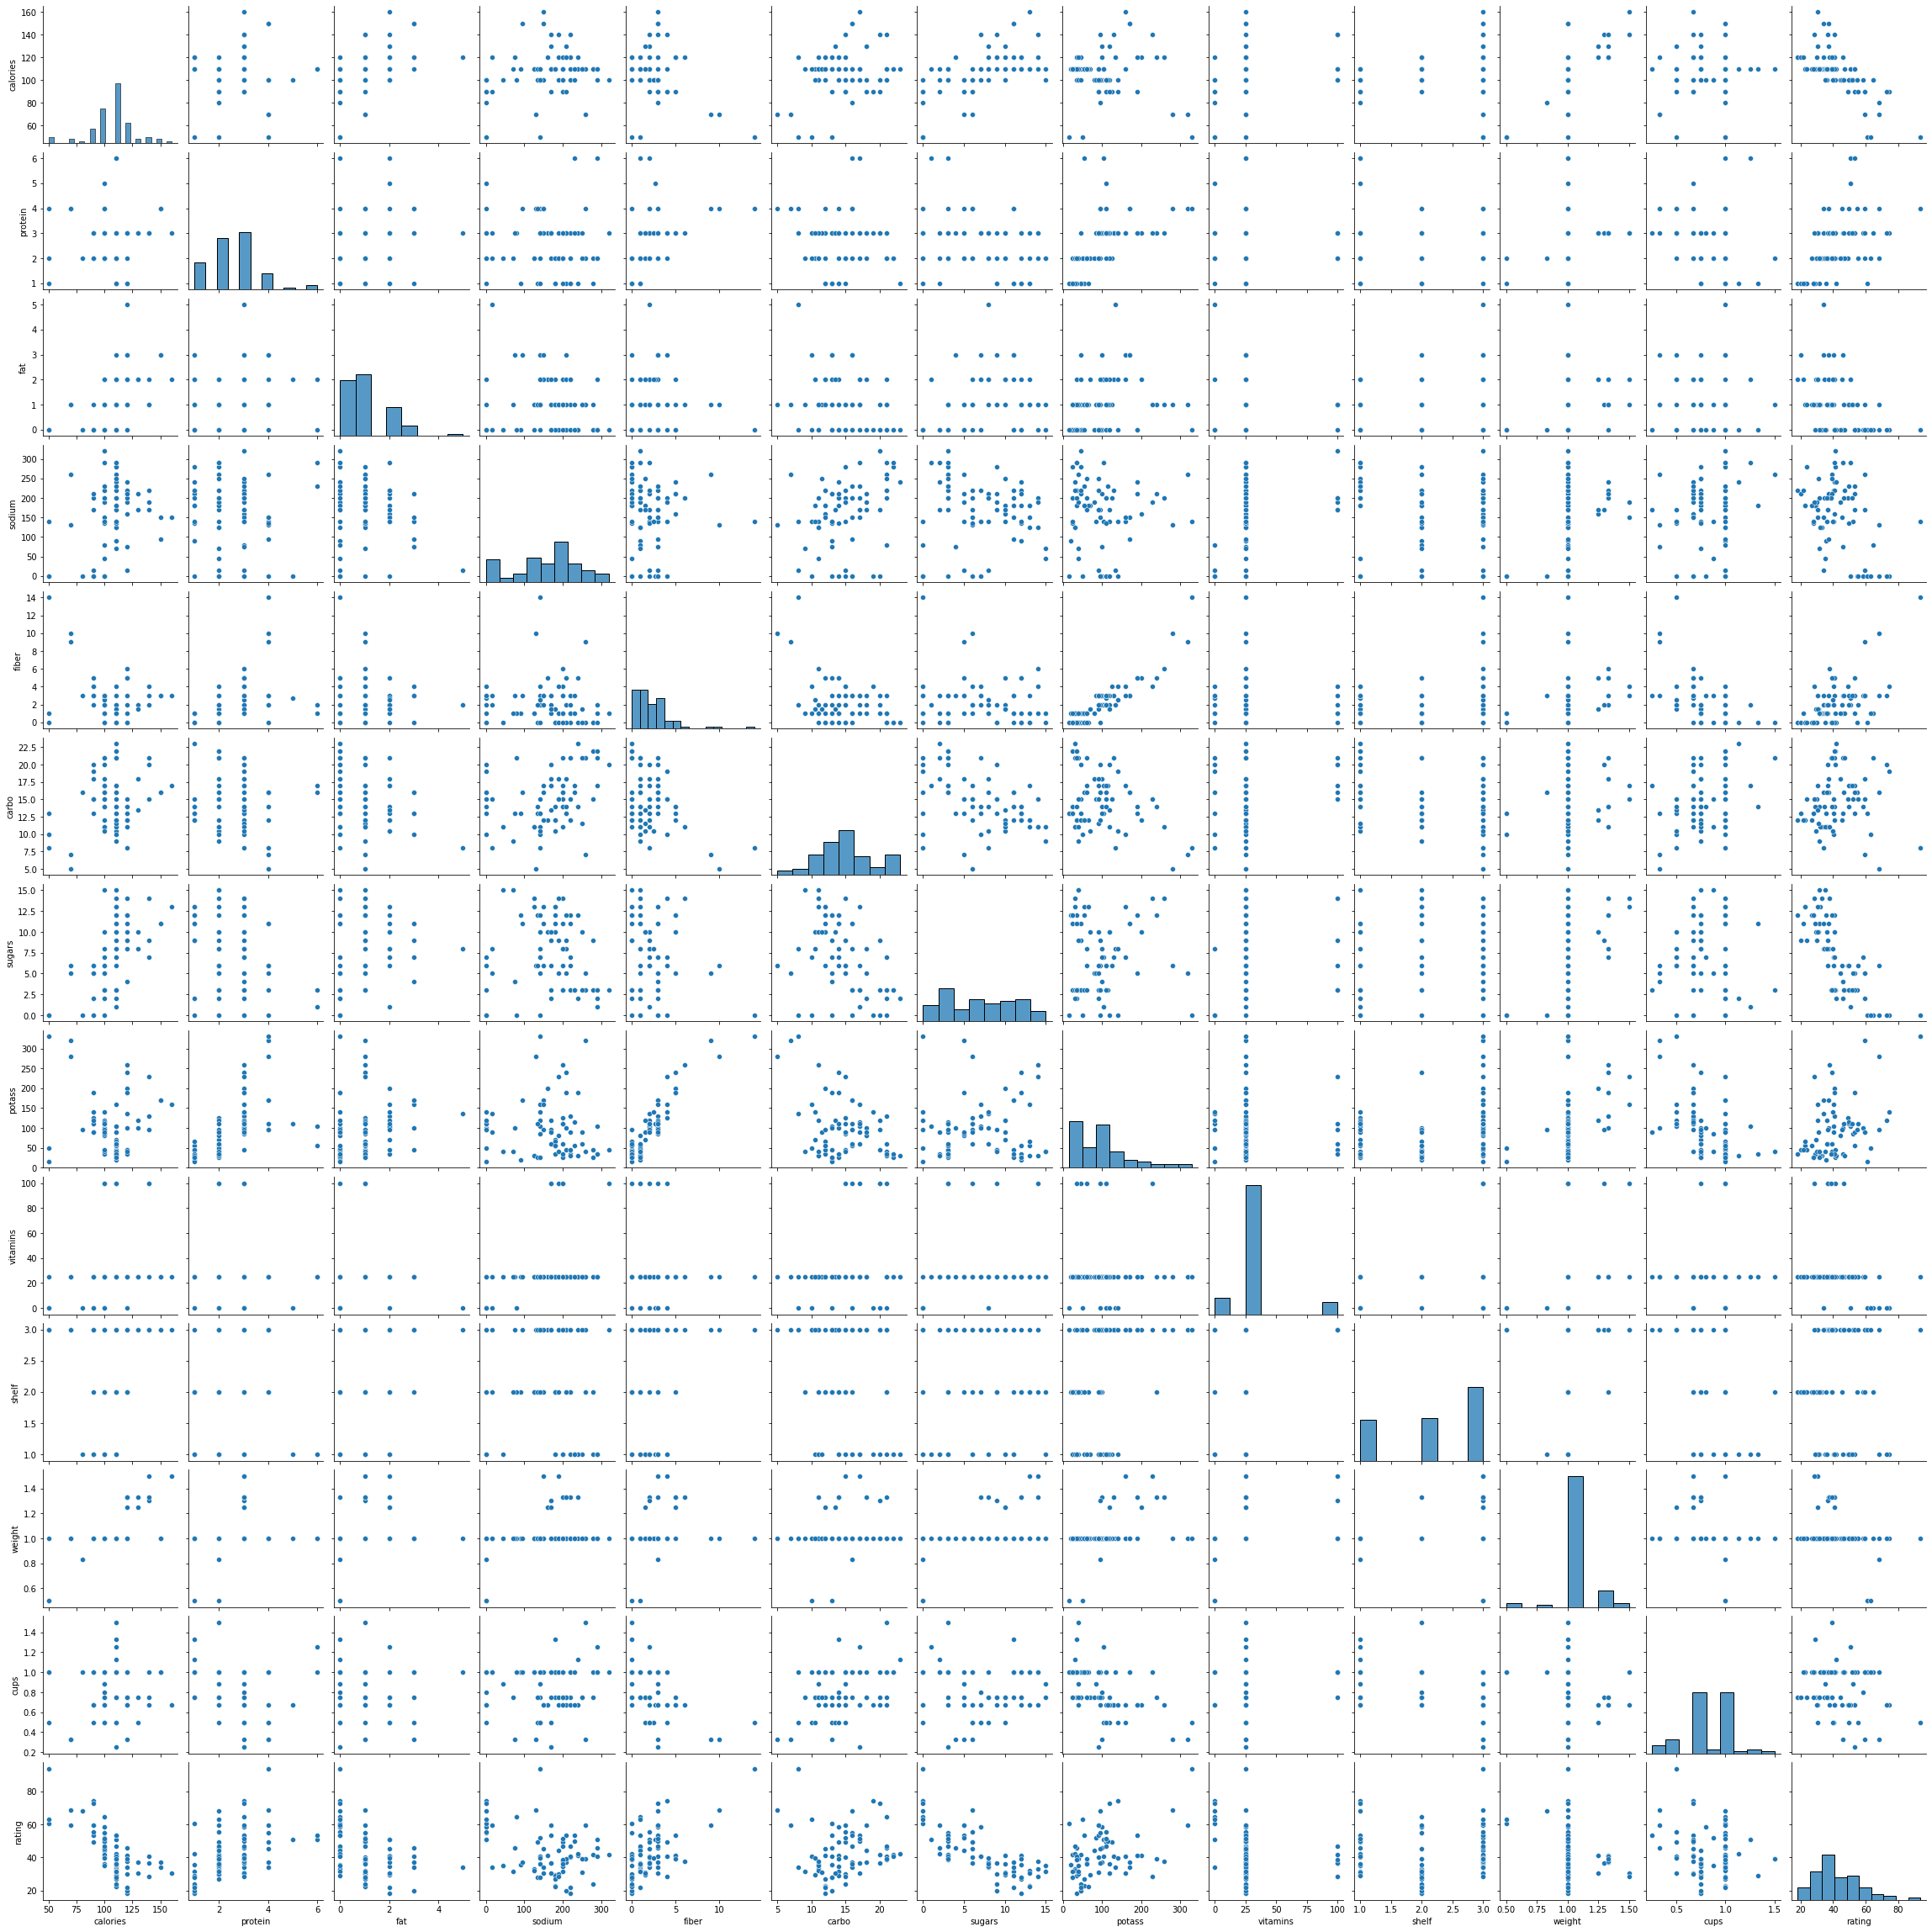

In [10]:
# Se genera un pairplot
sns.pairplot(cereals_df);

La variable `mfr` es categórica, según lo obtenido en la pregunta 1. Se analizará más a profundidad sus descriptivos:

In [11]:
# Se obtienen conteos, número de valores únicos, moda y
# y su frecuencia para la variables no numéricas
cereals_df['mfr'].describe(include = 'object')

count     77
unique     7
top        K
freq      23
Name: mfr, dtype: object

Se puede observar que dicha variable tiene 7 categorías distintas. La categoría más frecuente es la 'K' (con 23 apariciones) . A continuación se procederá a obtener las frecuencias de cada categoría

In [12]:
cereals_df['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

Según la descripción de la variable en Kaggle, `mfr`es el fabricante del cereal  (manufacturer of cereal). Con la siguiente nomenclaura:

+ A : American Home Food Products;
+ G : General Mills
+ K : Kelloggs
+ N : Nabisco
+ P : Post
+ Q : Quaker Oats
+ R : Ralston Purina

Una gráfica de barras nos permitirá tener una mejor perspectiva de estos conteos

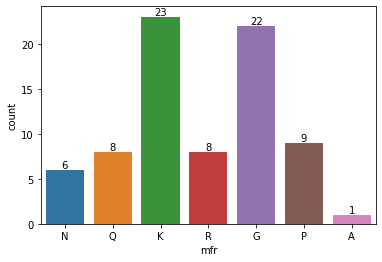

In [13]:
# Se construye la gráfica de barras para "mfr"
ax = sns.countplot(x = "mfr", data = cereals_df)
for container in ax.containers:
    ax.bar_label(container)

La variable `shelf` es numérica, según lo obtenido en la pregunta 1. Se analizará más a profundidad sus descriptivos:

In [14]:
cereals_df['shelf'].describe()

count    77.000000
mean      2.207792
std       0.832524
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: shelf, dtype: float64

A continuación se procederá a obtener las frecuencias de esta variable `shelf`:

In [15]:
cereals_df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

A partir de esto, se puede notar que la variable `shelf` sólo toma 3 valores: 1, 2 y 3. Según la información proporcionada por Kaggle, la variable `shelf` represenra "display shelf (1, 2, or 3, counting from the floor)". Es decir, que aunque la variable está codificada como numérica, en realidad es una variable categórica ordinal.

**Importante:** Por esta razón se cambiará la codificación de esta variable a nominal.

In [16]:
# Se cambia la variable 'shelf' a nominal
cereals_df['shelf'] = cereals_df['shelf'].astype(str)

Una gráfica de barras nos permitirá tener una mejor perspectiva de estos conteos

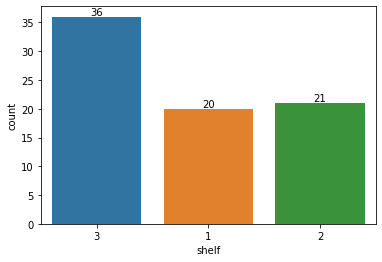

In [17]:
# Se construye la gráfica de barras para "shelf"
ax = sns.countplot(x = "shelf", data = cereals_df)
for container in ax.containers:
    ax.bar_label(container)

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

Para obtener dicha información, se generará una tabla de contingencia con respecto a las variables `shelf` y `mfr`.

In [18]:
# Se genera la tabla de contingencia con respecto a las variable
# 'shelf' y 'mfr'
pd.crosstab(cereals_df['shelf'], cereals_df['mfr'],
            margins = True, margins_name = "Total")

mfr,A,G,K,N,P,Q,R,Total
shelf,,,,,,,,
1,0,6,4,3,2,1,4,20
2,1,7,7,2,1,3,0,21
3,0,9,12,1,6,4,4,36
Total,1,22,23,6,9,8,8,77


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

Primero veremos de qué tipo es la variable `rating`:

In [19]:
cereals_df['rating'].dtypes

dtype('float64')

Como la variable rating es numérica, se tiene que tienen que construir clases por intervalos y posteriormente contar la frecuencia de cada una de esas clases. Para determinar el número de intervalor de clase se considerará la regla de Sturges. Dicha regla fue propuesta por Herbert Sturges en 1926 y es una regla práctica acerca del número de clases que deben considerar al elaborarse un histograma. Dicha regla establece que el número de intervalos de clase debe ser

$$ c = 1 + \frac{\log(n)}{\log(2)},$$

donde $n$ es el número de observaciones de la variable en consideración.

In [20]:
# Se usará la regla de Sturges
num_intervalos = math.ceil(1 + np.log(len(cereals_df))/np.log(2))
num_intervalos

8

A continuación se construirán los intervalos de clase y la frecuencia de cada uno

In [21]:
# Se obtiene la frecuencia de los intervalos de clase
conteo_clases = pd.cut(cereals_df['rating'],
                       bins=num_intervalos).value_counts()

conteo_clases

(27.501, 36.958]    22
(36.958, 46.416]    22
(46.416, 55.874]    14
(17.967, 27.501]     7
(55.874, 65.332]     7
(65.332, 74.789]     4
(84.247, 93.705]     1
(74.789, 84.247]     0
Name: rating, dtype: int64

In [22]:
# Intervalo(s) (rango(s)) con la mayor frecuencia
conteo_clases[conteo_clases == max(conteo_clases)]

(27.501, 36.958]    22
(36.958, 46.416]    22
Name: rating, dtype: int64

Para mejor entendimiento de la variable `rating` se construirá un histograma

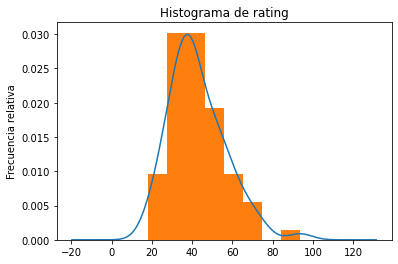

In [23]:
# Hacemos el histograma
fig, ax = plt.subplots()
cereals_df['rating'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de rating')
cereals_df['rating'].plot.hist(density=True, ax=ax, bins=num_intervalos)
ax.set_ylabel('Frecuencia relativa');

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [24]:
# Se ordenan los datos descendentemente con respecto a la variable
# `rating`
df_rating_ordenado = cereals_df[['mfr', 'rating']].sort_values(by=['rating'], ascending=False)

# Se muestran los 10 mayores valores de `rating`
top_10_rating = df_rating_ordenado[0:10].copy()

top_10_rating


,mfr,rating
3,K,93.704912
64,N,74.472949
65,N,72.801787
0,N,68.402973
63,N,68.235885
20,N,64.533816
55,Q,63.005645
54,Q,60.756112
50,K,59.642837
2,K,59.425505


In [25]:
nombres_mfr = {'A':'American Home Food Products',
               'G':'General Mills',
               'K':'Kelloggs',
               'N':'Nabisco',
               'P':'Post',
               'Q':'Quaker Oats',
               'R':'Ralston Purina'}

# Generamos una nueva columna con el nombre completo del fabricante
top_10_rating['fabricante'] = top_10_rating['mfr'].map(nombres_mfr)

In [26]:
top_10_rating

,mfr,rating,fabricante
3,K,93.704912,Kelloggs
64,N,74.472949,Nabisco
65,N,72.801787,Nabisco
0,N,68.402973,Nabisco
63,N,68.235885,Nabisco
20,N,64.533816,Nabisco
55,Q,63.005645,Quaker Oats
54,Q,60.756112,Quaker Oats
50,K,59.642837,Kelloggs
2,K,59.425505,Kelloggs


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

In [27]:
# Generamos una nueva columna con el nombre completo del fabricante
cereals_df['fabricante'] = cereals_df['mfr'].map(nombres_mfr)

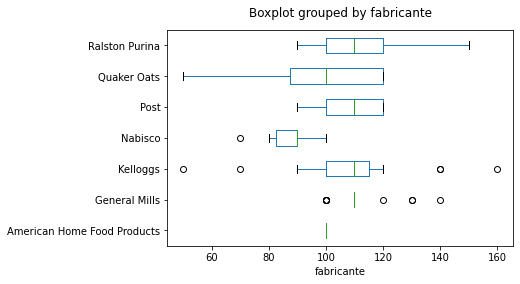

In [28]:
# Boxplots con respecto a las categorías de la variable
# 'fabricante'
graf = cereals_df.boxplot(by = 'fabricante',
                           column = ['calories'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

Se puede observar que la distribución del `rating` es diferente en cada una de los fabricantes. Tienen medianas y variabilidades diferentes.

In [29]:
# Se elimina la columna 'fabricante' para no intervenir en futuros
# analisis
cereals_df = cereals_df.drop(['fabricante'], axis=1)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

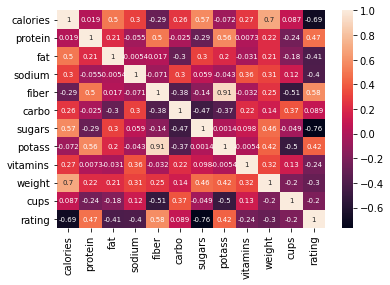

In [30]:
# Se construye el mapa de calor a partir de las correlaciones
# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(cereals_df.corr(),
            annot=True, annot_kws={"fontsize":7});

In [31]:
# Se obtiene la matriz de correlaciones
matriz_corr = cereals_df.corr()
matriz_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.320324,0.128405,-0.240544
weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138467,0.455844,0.419933,0.320324,1.000000,-0.199583,-0.298124


La pregunta es ligeramente ambigua. Se puede interpretar cómo que se buscan **las 2 variables con mayor correlación** con `rating` ó bien como **las 2 variables con mayor GRADO de correlación** con `rating`

Si se pide **las 2 variables con mayor correlación** con `rating`:

In [32]:
corr_rating = matriz_corr['rating'].sort_values(ascending = False)
corr_rating

rating      1.000000
fiber       0.584160
protein     0.470618
potass      0.416009
carbo       0.088712
cups       -0.203160
vitamins   -0.240544
weight     -0.298124
sodium     -0.401295
fat        -0.409284
calories   -0.689376
sugars     -0.763902
Name: rating, dtype: float64

Entonces, las 2 variables con mayor correlación con `rating` son:

In [33]:
corr_rating[1:3].index.tolist()

['fiber', 'protein']

Se mostrará un diagrama de dispersión para mostrar su relación:

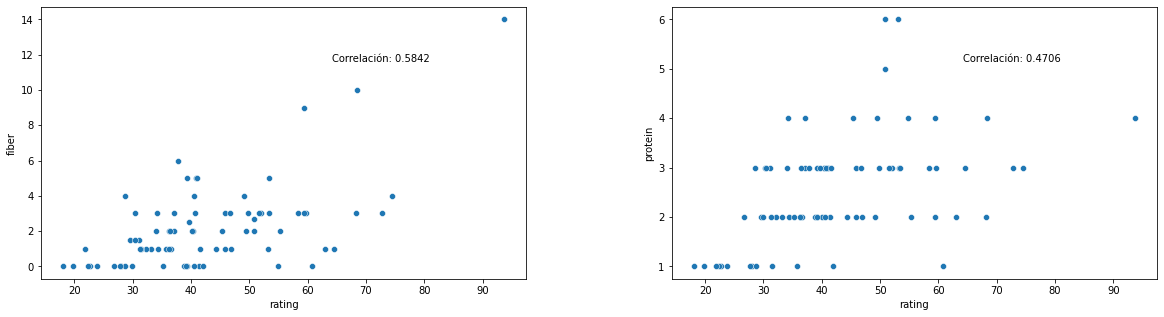

In [34]:
cols_de_interes = corr_rating[1:3].index.tolist()

fig, axes = plt.subplots(1,2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(cereals_df[cols_de_interes], axes):
  sns.scatterplot(x=cereals_df['rating'], y=cereals_df[col], ax=ax)
  ax.set(title=None, xlabel='rating')
  correl= round(cereals_df['rating'].corr(cereals_df[col]),4)
  ax.annotate('Correlación: {}'.format(correl), xy=(0.60, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

Si se pide **las 2 variables con mayor GRADO de correlación** con `rating`:

In [35]:
# Se obtienen las correlaciones absolutas con 'rating' y se
# ordenan descendentemente
corr_rating = abs(matriz_corr['rating']).sort_values(ascending = False)
corr_rating

rating      1.000000
sugars      0.763902
calories    0.689376
fiber       0.584160
protein     0.470618
potass      0.416009
fat         0.409284
sodium      0.401295
weight      0.298124
vitamins    0.240544
cups        0.203160
carbo       0.088712
Name: rating, dtype: float64

Entonces, las 2 variables con mayor grado de correlación con `rating` son:

In [36]:
corr_rating[1:3].index.tolist()

['sugars', 'calories']

Se mostrará un diagrama de dispersión para mostrar su relación:

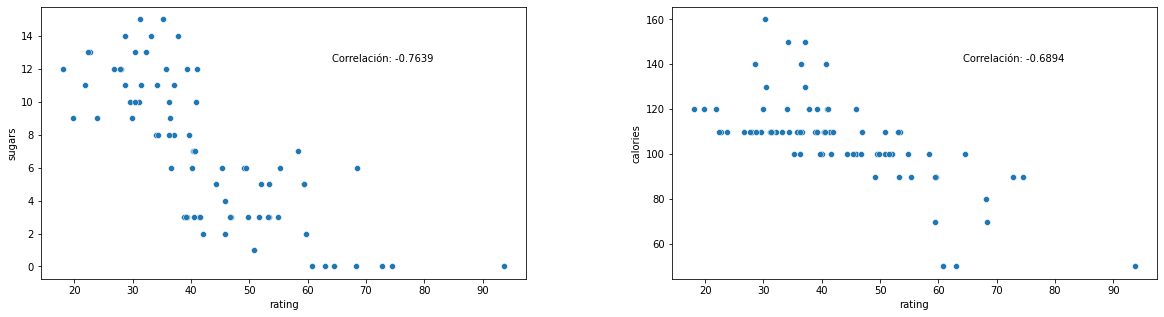

In [37]:
cols_de_interes = corr_rating[1:3].index.tolist()

fig, axes = plt.subplots(1,2, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(cereals_df[cols_de_interes], axes):
  sns.scatterplot(x=cereals_df['rating'], y=cereals_df[col], ax=ax)
  ax.set(title=None, xlabel='rating')
  correl= round(cereals_df['rating'].corr(cereals_df[col]),4)
  ax.annotate('Correlación: {}'.format(correl), xy=(0.60, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [38]:
# Se eliminan los valores faltantes
cereals_df = cereals_df.dropna(how = 'any')

# Se reinicia el índice
cereals_df = cereals_df.reset_index(drop=True)

# Se le da un vistazo al dataframe resultante
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

Primero obtenemos la lista de las variables numéricas

In [39]:
# Guardamos la serie en un objeto
x = cereals_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

lista_numericas = df_columnas[df_columnas['tipo'] != 'object']['variable']
lista_numericas = lista_numericas.tolist()
lista_numericas

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'vitamins',
 'weight',
 'cups',
 'rating']

Se revisará la información que presenta Kaggle de estas variables:

+ calories: calories per serving
+ protein: grams of protein
+ fat: grams of fat
+ sodium: milligrams of sodium
+ fiber: grams of dietary fiber
+ carbo: grams of complex carbohydrates
+ sugars: grams of sugars
+ potass: milligrams of potassium
+ vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
+ weight: weight in ounces of one serving
+ cups: number of cups in one serving
+ rating: a rating of the cereals (Possibly from Consumer Reports?)

Según esta información, la variable `vitamins` sólo toma tres valores. Revisaremos este hecho:

In [40]:
cereals_df['vitamins'].value_counts()

25     62
0       6
100     6
Name: vitamins, dtype: int64

Efectivamente, la variable `vitamins` sólo toma 3 valores: 25, 0 y 100. Además, a partir de la descripción, aunque la variable está condificada como numérica, ésta representa una categoría. Por tanto se considerará como variable categórica ordinal

In [41]:
# Se cambia de tipo a la variable 'vitamins'
cereals_df['vitamins'] = cereals_df['vitamins'].astype(str)

De nuevo obtenemos la lista de las variables numéricas

In [42]:
# Guardamos la serie en un objeto
x = cereals_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

lista_numericas = df_columnas[df_columnas['tipo'] != 'object']['variable']
lista_numericas = lista_numericas.tolist()
lista_numericas

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups',
 'rating']

Como se tiene que separar a la variable `rating`, se separa de este listado

In [43]:
lista_numericas.remove("rating")

In [44]:
lista_numericas

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups']

In [45]:
# Estas variables numéricas se considerarán como variables predictoras
lista_predictores = lista_numericas
lista_predictores

['calories',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'potass',
 'weight',
 'cups']

In [46]:
# Se consruye el dataset de las variables predictoras
X = cereals_df[lista_predictores]

# Se consruye el dataset de la variable de salida
y = cereals_df['rating']

In [47]:
# Se le da un vistazo al dataset de las variables predictoras
X.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,1.0,0.75


In [48]:
# Se le da un vistazo al dataset de la variable de salida
y.head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    29.509541
Name: rating, dtype: float64

In [49]:
# Se escalan los valores de las variables predictoras
sc = StandardScaler()
X_esc = sc.fit_transform(X)

# Se define las características de la transformación PCA
pca = PCA(n_components = len(X.columns))
 
# Se aplica PCA a las variables predictoras escaladas
X_pca = pca.fit_transform(X_esc)

# Se convierte en un dataframe a las variables proyectadas por PCA
variables_proyectadas = pd.DataFrame(X_pca)

In [50]:
# Se le da un vistazo al dataframe
variables_proyectadas.head()

,0,1,2,3,4,5,6,7,8,9
0,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331,0.069590,0.010789,0.256653,0.024920
1,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450,-1.234160,-0.581422,0.031777,-0.102268
2,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438,0.015882,0.119841,-0.491732,-0.029560
3,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144,-1.003039,0.050854,0.724192,0.102261
4,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175,0.037076,-0.187569,0.168728,-0.051198


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

Se obtendrá la proporción de **varianza explicada** por cada una de las componentes principales

In [51]:
varianza_explicada = pca.explained_variance_ratio_

varianza_explicada

array([0.30797524, 0.24958721, 0.16518502, 0.09442929, 0.06743118,
       0.06259086, 0.03582656, 0.00936177, 0.00578247, 0.00183039])

Ahora, se obtiene la proporción de **varianza acumulada** de las componentes principales

In [52]:
varianza_acumulada = np.cumsum(varianza_explicada)
varianza_acumulada

array([0.30797524, 0.55756245, 0.72274747, 0.81717676, 0.88460794,
       0.9471988 , 0.98302536, 0.99238714, 0.99816961, 1.        ])

Ahora se obtendrá el número mínimo de componentes principales que explique más del 90% de la varianza

In [53]:
# Se define el nivel de varianza requerido
nivel_requerido = 0.9

# Se obtiene el número de componentes principales que se requieren
# para superar el nivel de varianza requerido
condicion = varianza_acumulada >= nivel_requerido
indice_cp = next((i for i, j in enumerate(condicion) if j), None)
num_cp = indice_cp + 1
num_cp

6

In [54]:
# Se construye el dataframe con el número de componentes requerido
variables_pca = variables_proyectadas.loc[:,:indice_cp]
variables_pca.columns = [f"{'componente'}_{j}" for j in range(1,num_cp+1)]

In [55]:
# Se le da un vistazo al dataframe

variables_pca.head()

,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6
0,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331
1,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450
2,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438
3,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144
4,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175


Para visualizar gráficamente en nivel de varianza que va explicando cada componente principal

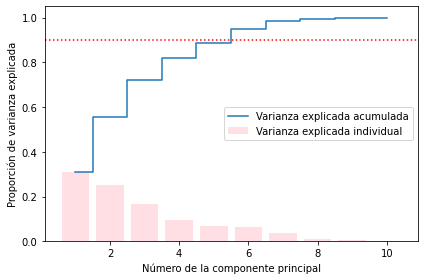

In [56]:
plt.bar(range(1,len(varianza_explicada)+1),
        varianza_explicada, alpha = 0.5, align = 'center', 
        label='Varianza explicada individual', color = "pink")
plt.step(range(1,len(varianza_acumulada)+1), varianza_acumulada, 
         where = 'mid', label = 'Varianza explicada acumulada')
# Se agrega una línea horizontal
plt.axhline(y = nivel_requerido, color = 'r', linestyle = ':')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Número de la componente principal')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?

Se puede ver la descomposición de cada componente principal con respecto a las variables originales

In [57]:
componentes_principales=pd.DataFrame(pca.components_,
                                     columns = lista_predictores,
                                     index=list(range(1, len(X.columns)+1)))

componentes_principales

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,weight,cups
1,0.007152,0.358470,0.196112,-0.052141,0.496667,-0.287875,0.067854,0.531933,0.253986,-0.385556
2,-0.603974,0.054872,-0.315332,-0.265143,0.195921,-0.099984,-0.438077,0.051275,-0.463405,-0.069311
3,0.066367,0.352978,-0.213340,0.413920,0.123184,0.596398,-0.459743,0.116050,0.219251,0.101934
4,0.163611,0.445650,0.659815,-0.321206,-0.190003,0.064132,-0.308863,-0.087025,-0.261030,0.157411
5,0.187545,0.040019,-0.336061,-0.799248,-0.024629,0.313426,0.048646,0.019825,0.329660,-0.034832
6,0.061589,-0.231488,0.151529,0.036724,-0.167615,0.222739,-0.221520,-0.202805,-0.034294,-0.865578
7,0.028326,0.685556,-0.383158,0.106751,-0.314341,-0.232482,0.252777,-0.307002,-0.076983,-0.232539
8,0.495550,-0.012770,-0.169426,0.014393,0.255812,0.250082,0.255337,0.214974,-0.694188,-0.063768
9,0.203309,0.010273,0.009445,-0.022976,0.659639,-0.133180,-0.114560,-0.696142,0.075892,0.039808
10,-0.526611,0.140881,0.264071,-0.014174,0.188643,0.514931,0.550518,-0.163635,-0.033226,-0.034776


Para obtener la importancia de las variables originales en la primera componente principal

In [58]:
componentes_principales.loc[1]

calories    0.007152
protein     0.358470
fat         0.196112
sodium     -0.052141
fiber       0.496667
carbo      -0.287875
sugars      0.067854
potass      0.531933
weight      0.253986
cups       -0.385556
Name: 1, dtype: float64

Para obtener las tres variables más importantes en el cálculo de la primer componente principal

In [59]:
impotancias_primer = abs(componentes_principales.loc[1]).sort_values(ascending=False)

# Las 3 más importantes
impotancias_primer[1:4].index.tolist()

['fiber', 'cups', 'protein']

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

Veamos un descriptivo de las variables categóricas

In [60]:
cereals_df.describe(include = 'object')

,name,mfr,type,vitamins,shelf
count,74,74,74,74,74
unique,74,7,2,3,3
top,Corn_Flakes,K,C,25,3
freq,1,23,73,62,35


In [61]:
lista_categoricas = cereals_df.describe(include = 'object').columns.tolist()
lista_categoricas

['name', 'mfr', 'type', 'vitamins', 'shelf']

+ name: Name of cereal
+ mfr: Manufacturer of cereal
+ type: cold/hot
+ vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
+ shelf: display shelf (1, 2, or 3, counting from the floor)

Se puede ver que hay 74 registros y cada uno tiene un nombre (name) diferente. Por tanto, la variable `name` **no** se considera como predictora.

In [62]:
lista_categoricas.remove("name")

Se analizará la siguiente losta de variables categóricas con respeto a su relación con la variable `rating`

In [63]:
lista_categoricas

['mfr', 'type', 'vitamins', 'shelf']

### Para la variable `mfr`

Recuérdese que esta representa al fabricante de cada cereal. Analizaremos si este rating cambia con respecto al fabricante.

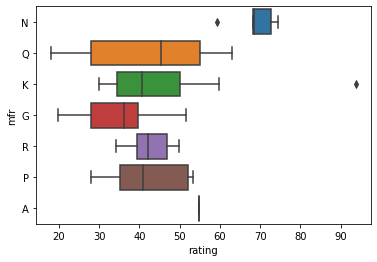

In [64]:
# Boxplots con respecto a las categorías de la variable 'mfr'
sns.boxplot(y = 'mfr', x = 'rating', data = cereals_df);

Se puede observar que dependiendo de cada fabricante, la distribución del rating es muy diferente tanto en medida de centro como de variabilidad. Por tanto se considera importante para la calificación y **sí** se considerará como predictora. Por supuesto, dado un cereal, podemos obtener su fabricante, haciéndola apta para el proceso predictivo.

### Para la variable `type`

Recuérdese que esta variable es 'Hot' ó 'Cold' (sin más información sobre qué representa). Analizaremos si el rating cambia con respecto a esta característica

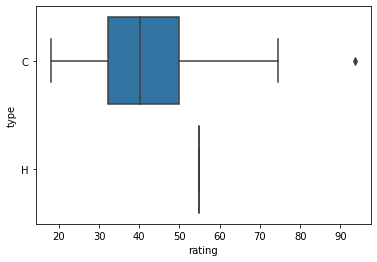

In [65]:
# Boxplots con respecto a las categorías de la variable 'type'
sns.boxplot(y = 'type', x = 'rating', data = cereals_df);

Se puede ver que hay una forma anómala del boxplot de los cereales con característca 'Hot'. Veamos la frecuencia de ésta

In [66]:
cereals_df['type'].value_counts()

C    73
H     1
Name: type, dtype: int64

Como sólo hay una observación con el valor 'H' en la variable 'type', ésta **no** se considerará como variable predictora

In [67]:
# Se elimina de la lista la variable 'type'
lista_categoricas.remove("type")

### Para la variable `vitamins`

Recuerdése que esta variable puede tomar los valores 0, 25, ó 100, indicando el porcentaje típico de vitaminas y minerarales recomendada por la FDA. Veamos si este porcentaje influencia al rating

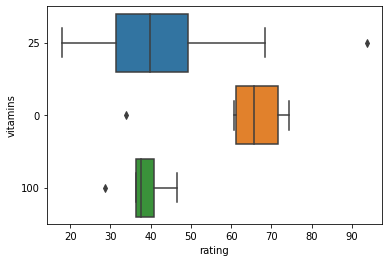

In [68]:
# Boxplots con respecto a las categorías de la variable 'vitamins'
sns.boxplot(y = 'vitamins', x = 'rating', data = cereals_df);

Se puede observar que dependiendo de cada porcentaje, la distribución del rating es muy diferente tanto en medida de centro, variabilidad y forma. Por tanto se considera importante para la calificación y **sí** se considerará como predictora. Por supuesto, dado un cereal, podemos obtener su porcentaje (categórico) de vitaminas y minerales según la clasificación de la FDA, haciéndola apta para el proceso predictivo.

### Para la variable `shelf`

Recuérdese que esta variable representa el nivel a la altura del suelo en la que se encuentra el cereal. Veamos si ésta tiene influencia en la distribución del rating

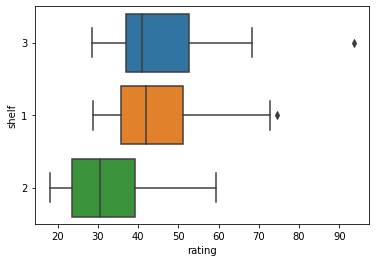

In [70]:
# Boxplots con respecto a las categorías de la variable 'shelf'
sns.boxplot(y = 'shelf', x = 'rating', data = cereals_df);

Se puede observar que dependiendo de su altura con respecto al suelo, la distribución del rating para los de nivel medio (etiqueta 2) es muy diferente tanto en medida de centro. Por tanto se considera importante para la calificación y **sí** se considerará como predictora. Por supuesto, dado un cereal, podemos obtener su nivel con respecto al suelo (categórico), haciéndola apta para el proceso predictivo.

Entonces, la lista de variables categóricas que se consideran potencialmente predictoras para el `rating` son:

In [71]:
lista_categoricas

['mfr', 'vitamins', 'shelf']

La elección entre one-hot encoding y dummy variables para representar variables categóricas depende de varios factores y del contexto específico del problema en consideración. Ambos enfoques son comunes para manejar variables categóricas, y cada uno tiene sus ventajas y desventajas.

+ One-hot encoding es útil cuando se tiene categorías nominales (sin un orden inherente) y se quiere tratar cada categoría como una característica independiente.
+ Es especialmente eficaz cuando las categorías tienen un alto cardinalidad (muchas categorías diferentes).
+ Es fácil de entender y aplicar.
+ Aunque como hemos visto, puede aumentar significativamente la dimensionalidad de los datos, lo que puede ser problemático si se tiene muchas categorías ó si se está trabajando con conjuntos de datos grandes.
+ Se prefiere con respecto a la codificación binaria (dummy) porque con la binaria se puede perder información sobre las relaciones entre categorías cuando estas tienen un orden natural.

In [72]:
cat_cols_encoded = []
for col in lista_categoricas:
  cat_cols_encoded += [f"{col}_{cat}" for cat in list(cereals_df[col].unique())]

encoder = OneHotEncoder(sparse=False)
cols_onehot = encoder.fit_transform(cereals_df[lista_categoricas])
df_enc = pd.DataFrame(cols_onehot, columns = cat_cols_encoded)

In [73]:
# Se le da un vistazo al dataframe
df_enc.head()

,mfr_N,mfr_Q,mfr_K,mfr_G,mfr_R,mfr_P,mfr_A,vitamins_25,vitamins_0,vitamins_100,shelf_3,shelf_1,shelf_2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [74]:
# Se concatenan los dataframe
df_final = pd.concat([cereals_df['rating'], variables_pca, df_enc],
          axis=1)

In [76]:
# Se le da un vistazo al dataframe
df_final.head()

,rating,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6,mfr_N,mfr_Q,mfr_K,mfr_G,mfr_R,mfr_P,mfr_A,vitamins_25,vitamins_0,vitamins_100,shelf_3,shelf_1,shelf_2
0,68.402973,4.957176,2.687495,-0.738944,-0.763077,-0.805876,-0.199331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,33.983679,1.455346,-1.021596,-2.439536,3.491834,-0.386668,-0.703450,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,59.425505,4.805993,2.265399,0.345146,-1.137000,-1.897325,-0.020438,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,93.704912,5.353223,4.424630,0.918565,-1.413447,-0.633642,-0.980144,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,29.509541,0.085789,-0.633744,-1.400987,0.218146,-0.866060,0.289175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
